Пора без каких - либо условий

In [57]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from py_utils.generate_pore_in_files import generate_pore_in_files

In [58]:
N = 300
S = 100
Cs = 0.001
alpha = 0.5
D = np.linspace(60, 60, num = 1)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 3.056550e+00 |g| = 1.025364e+01 alpha = 1.000000e+00 
hessian scaling: 2.12708
it =  1  E = 2.799079e+00 |g| = 9.458842e+00 alpha = 1.097526e-01 
it =  2  E = 2.880749e+00 |g| = 9.678161e+00 alpha = 1.002730e-01 
it =  3  E = 1.457690e+01 |g| = 1.012846e+01 alpha = 4.416201e-03 
it =  4  E = 1.017083e+01 |g| = 9.931310e+00 alpha = 8.857889e-03 
it =  5  E = 8.691007e+00 |g| = 9.873121e+00 alpha = 1.204968e-02 
it =  6  E = 1.553470e+01 |g| = 9.900780e+00 alpha = 3.777121e-03 
it =  7  E = 1.853460e+01 |g| = 9.925126e+00 alpha = 2.664742e-03 
it =  8  E = 3.012489e+01 |g| = 9.960159e+00 alpha = 1.010853e-03 
it =  9  E = 2.581440e+01 |g| = 9.976139e+00 alpha = 1.382169e-03 
it =  10  E = 4.864626e+01 |g| = 9.994987e+00

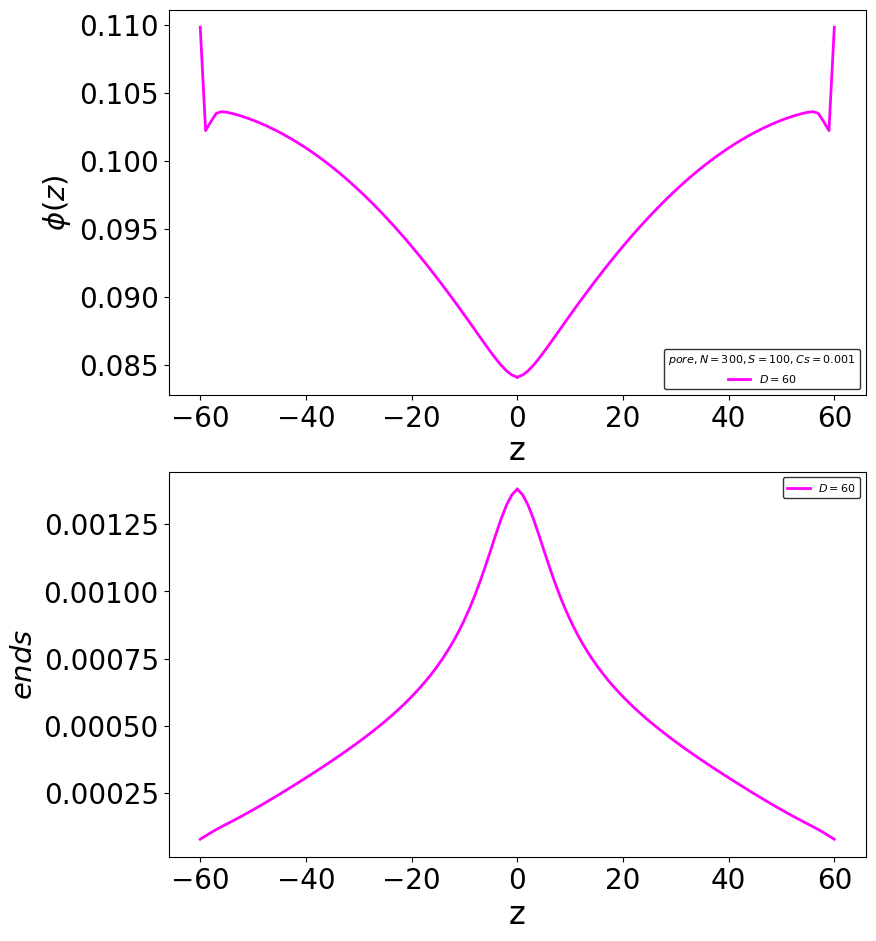

In [59]:
colors = ['fuchsia', 'blue', 'limegreen', 'orangered', 'orange', 'skyblue', 'slateblue', 'black', 'hotpink',
              'crimson', 'aquamarine']

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for d, color in zip(D, colors):
    file_name_pro_pore = generate_pore_in_files(template_pore = '/home/tpopova/prj/PB_SCF/pore_templates/pore_template.in',
                   
                   #название параметра
                   range_param = 'D',

                   N_brush = N,
                   S = S,
                   Cs = Cs,
                   alpha = alpha,
                   D = round(d),
                   min_range_value = min(D),
                   max_range_value = max(D),
                    )

    c_polymer_pore = np.asarray(pd.read_csv(file_name_pro_pore, sep='\t')['mol_pol_phi'])

    ends_pore = np.asarray(pd.read_csv(file_name_pro_pore, sep='\t')['mon_E_phi'])
    
    r_range = np.linspace(0, round(d), num = round(d))
    
        
    ax1.plot(r_range, c_polymer_pore,
                linestyle='-',
                linewidth= 2,
                color=color,
                label=f'$D = {round(d)}$')
    
    ax1.plot(-1 * r_range, c_polymer_pore,
                linestyle='-',
                linewidth= 2,
                color=color)
    
    ax2.plot(r_range, ends_pore,
            linestyle='-',
            linewidth= 2,
            color=color,
            label=f'$D = {round(d)}$')
    
    ax2.plot(-1 * r_range, ends_pore,
            linestyle='-',
            linewidth= 2,
            color=color)

#  Добавляем подписи к осям:
ax1.set_xlabel('z',
                fontsize=23,  
                color='black', labelpad=2.5) 

ax1.set_ylabel(r'$\phi(z)$',
                fontsize=21, 
                color='black')
ax2.set_xlabel('z',
                fontsize=23, 
                color='black') 

ax2.set_ylabel('$ends$',
                fontsize=21,
                color='black') 

# legend
ax1.legend(title = f'$pore, N = {N}, S = {S}, Cs = {Cs}$',
    fontsize=8,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии
            title_fontsize='8',  # размер шрифта заголовка
            loc = 'lower right')
# legend
ax2.legend(fontsize=8,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии   #  заголовок
            title_fontsize='8', loc = 'upper right'  # размер шрифта заголовка
            )

fig.set_figwidth(9)
fig.set_figheight(11)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.show()

In [60]:
ends_pore

array([1.37965654e-03, 1.35905302e-03, 1.32075709e-03, 1.26962897e-03,
       1.21108652e-03, 1.14992415e-03, 1.08968640e-03, 1.03257555e-03,
       9.79682091e-04, 9.31323046e-04, 8.87353198e-04, 8.47395863e-04,
       8.10990398e-04, 7.77674846e-04, 7.47025466e-04, 7.18670922e-04,
       6.92293343e-04, 6.67623565e-04, 6.44434430e-04, 6.22534037e-04,
       6.01759705e-04, 5.81972906e-04, 5.63055099e-04, 5.44904334e-04,
       5.27432494e-04, 5.10563047e-04, 4.94229231e-04, 4.78372573e-04,
       4.62941669e-04, 4.47891188e-04, 4.33181045e-04, 4.18775729e-04,
       4.04643751e-04, 3.90757191e-04, 3.77091343e-04, 3.63624428e-04,
       3.50337376e-04, 3.37213674e-04, 3.24239278e-04, 3.11402590e-04,
       2.98694512e-04, 2.86108574e-04, 2.73641154e-04, 2.61291762e-04,
       2.49063379e-04, 2.36962763e-04, 2.25000622e-04, 2.13191466e-04,
       2.01552899e-04, 1.90104084e-04, 1.78863020e-04, 1.67842331e-04,
       1.57043227e-04, 1.46447068e-04, 1.36001652e-04, 1.25589898e-04,
      

In [61]:
f = (ends_pore[-1] - ends_pore[-2])/(r_range[-1] - r_range[-2])
print(f)


-1.196636639320245e-05
